# Carbon Monoxide No Data Exploration

Explores Sentinel-5P CO data.

To convert from mol/m<sup>2</sup> to molecules/cm<sup>2</sup>, multiply by 6.022140857e+19 (6.022140857 * 10<sup>19</sup>).

# Environment Setup

In [1]:
# Load Notebook formatter
%load_ext nb_black
# %reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
# Import packages
import os
import glob
import xarray as xr
import harp
from harp._harppy import NoDataError
import rasterio as rio
import rioxarray
from rioxarray.exceptions import MissingCRS
import radiance as rd
import sentinel as stl

# from datetime import timedelta
# from math import sqrt
import matplotlib.pyplot as plt

# import numpy as np
# from scipy import stats
# from scipy.interpolate import UnivariateSpline
import seaborn as sns

# import pandas as pd
# from pandas.plotting import register_matplotlib_converters
# import radiance as rd
# import sentinel as stl

<IPython.core.display.Javascript object>

In [3]:
# Set Options
# np.set_printoptions(precision=15)
# np.set_printoptions(suppress=True)
sns.set(font_scale=1.5, style="whitegrid")
sns.set(font_scale=1.5)
# pd.set_option("display.max_columns", None)
# # pd.set_option("display.max_rows", None)
# pd.set_option("precision", 15)
# register_matplotlib_converters()

<IPython.core.display.Javascript object>

In [4]:
# Set working directory
os.chdir("..")
print(f"Working directory: {os.getcwd()}")

Working directory: C:\PSU\08-covid19-remote-sensing-fusion\00-git-repos\sentinel-5p-no2


<IPython.core.display.Javascript object>

# User-Defined Variables

In [5]:
def read_geotiff_into_array(geotiff_path, dimensions=1):
    """Reads a GeoTiff file into a NumPy array.

    Parameters
    ----------
    geotiff_path : str
        Path to the GeoTiff file.

    dimensions : int, optional
        Number of bands to read in. Default value is 1.

    Returns
    -------
    array : numpy array
        Array containing the data.

    Example
    -------
        >>>
        >>>
        >>>
        >>>
    """
    # Read-in array
    with rio.open(geotiff_path) as src:
        array = src.read(dimensions)

    return array

<IPython.core.display.Javascript object>

In [6]:
def calculate_percent_masked(array):
    """Calculates the percent of masked pixels
    (NaN) as a decimal from an input array.

    This function calculates the percent as
    an axis-independent number (for the entire
    array).

    Parameters
    ----------
    array : numpy.ndarray
        Input array containing data.

    Returns
    -------
    percent_masked : float
        The percent of masked values, as a decimal.

    Example
    -------
        >>> # Imports
        >>> import numpy as np
        >>> import numpy.ma as ma
        >>> # Create masked array
        >>> masked_arr = ma.array(
        ...     [1, 2, 3, 4],
        ...     mask=[True, False, True, False]
        ... )
        >>> # Calculate percent masked
        >>> calculate_percent_masked(masked_arr)
        0.5
    """
    # Raise error if input data not numpy array
    if not isinstance(array, np.ndarray):
        raise TypeError("Input must be of type numpy.ndarray.")

    # Get percent masked
    percent_masked = 100 * round(
        np.count_nonzero(np.isnan(array)) / array.size, 4
    )

    # Return percent masked
    return percent_masked

<IPython.core.display.Javascript object>

In [7]:
# Set paths Level-3 GeoTiff files
co_level3_folder = os.path.join(
    "03-processed-data", "raster", "south-korea", "carbon-monoxide"
)

no2_level3_folder = os.path.join(
    "03-processed-data", "raster", "south-korea", "daily"
)

<IPython.core.display.Javascript object>

# Data Acquisition and Preprocessing

In [10]:
# Get Level-3 files into list
if os.path.exists(co_level3_folder):
    co_level3_geotiffs = glob.glob(os.path.join(co_level3_folder, "*.tif"))
    image_count_co = len(co_level3_geotiffs)
else:
    print("Invalid path.")
print(f"Number of CO GeoTiffs: {image_count_co}")

if os.path.exists(no2_level3_folder):
    no2_level3_geotiffs = glob.glob(os.path.join(no2_level3_folder, "*.tif"))
    image_count_no2 = len(no2_level3_geotiffs)
else:
    print("Invalid path.")
print(f"Number of NO2 GeoTiffs: {image_count_no2}")

Number of CO GeoTiffs: 1171
Number of NO2 GeoTiffs: 1176


<IPython.core.display.Javascript object>

In [9]:
# Calculate percent masked for each GeoTiff
percent_masked_co = np.array(
    [
        calculate_percent_masked(read_geotiff_into_array(geotiff))
        for geotiff in co_level3_geotiffs
    ]
)
print(percent_masked_co.shape)

percent_masked_no2 = np.array(
    [
        calculate_percent_masked(read_geotiff_into_array(geotiff))
        for geotiff in no2_level3_geotiffs
    ]
)
print(percent_masked_no2.shape)

(1171,)
(1176,)


<IPython.core.display.Javascript object>

In [ ]:
# Use dark background
# with plt.style.context("dark_background"):

#     # Create figure and axes object
#     fig, ax = ep.hist(
#         percent_masked,
#         #         hist_range=hist_range,
#         colors="#984ea3",
#         title="Carbon Monoxide",
#         xlabel="Percent of Masked Pixels (%)",
#         ylabel="Count",
#     )

#     # Add super title
#     plt.suptitle(
#         f"Masked Data Exploration, South Korea, 7/01/2019 - 12/31/2020",
#         size=24,
#     )

#     # Adjust spacing
#     plt.subplots_adjust(top=0.9)

#     # Add caption
#     fig.text(
#         0.5,
#         0.03,
#         f"Data Source: European Space Agency",
#         ha="center",
#         fontsize=14,
#     )

Saved plot: south-korea-percent-masked-histograms-10-bin-co-no2-20180701-20201231


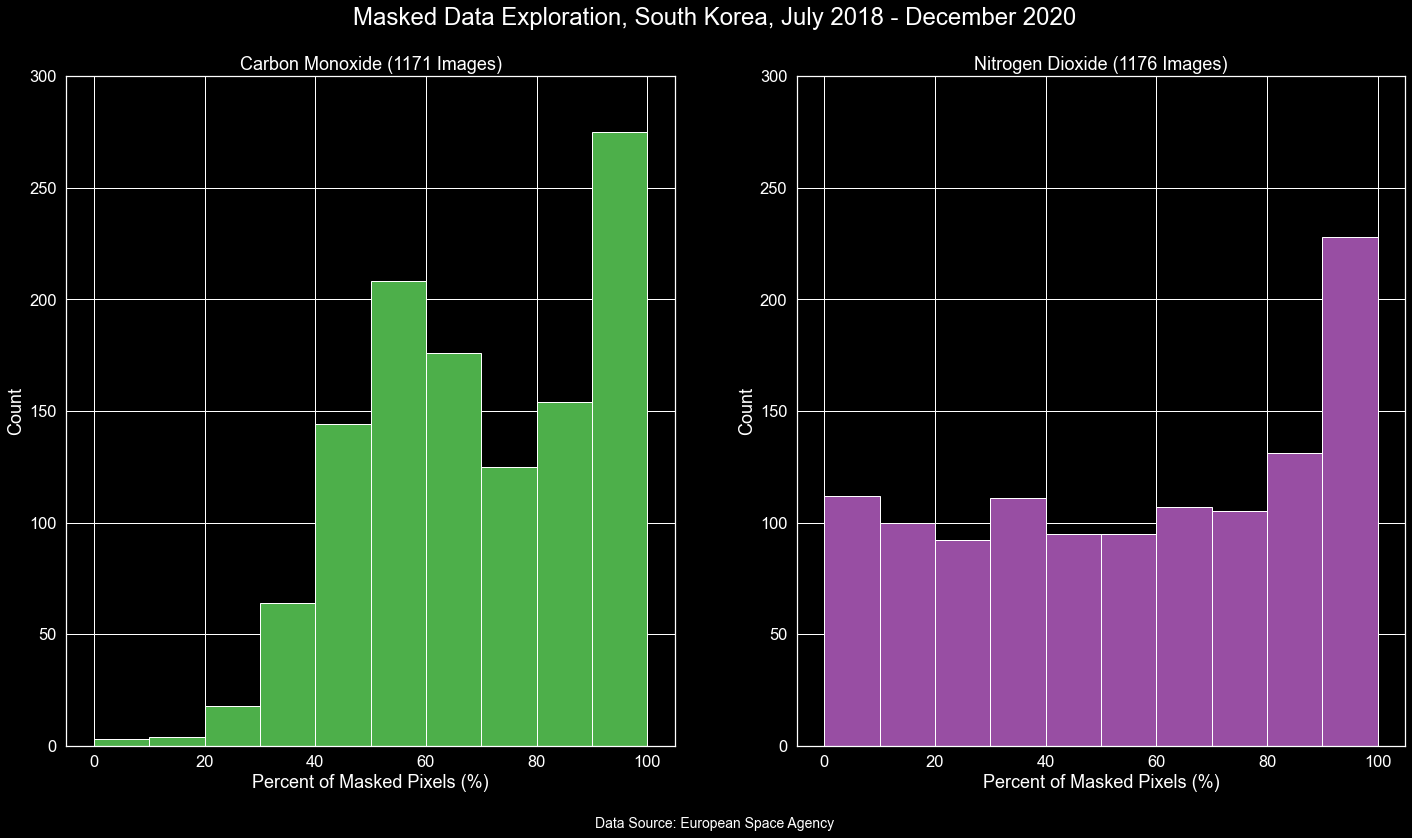

<IPython.core.display.Javascript object>

In [11]:
with plt.style.context("dark_background"):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 12))
    #     plt.hist(x=percent_masked_co, bins=20, ax=ax[0])
    ax[0].hist(
        x=percent_masked_co,
        bins=10,
        #                color="#984ea3",
        color="#4daf4a",
        range=(0, 100),
    )
    ax[1].hist(x=percent_masked_no2, bins=10, color="#984ea3", range=(0, 100))
    # Add super title
    plt.suptitle(
        f"Masked Data Exploration, South Korea, July 2018 - December 2020",
        size=24,
    )

    # Adjust spacing
    plt.subplots_adjust(top=0.9)

    # Add caption
    fig.text(
        0.5,
        0.03,
        f"Data Source: European Space Agency",
        ha="center",
        fontsize=14,
    )

    titles = [
        f"Carbon Monoxide ({image_count_co} Images)",
        f"Nitrogen Dioxide ({image_count_no2} Images)",
    ]
    for index, axis in enumerate(fig.axes):
        axis.set_title(titles[index])
        axis.set_xlabel("Percent of Masked Pixels (%)")
        axis.set_ylabel("Count")
        axis.set_ylim(0, 300)

stl.save_figure(
    output_path=os.path.join(
        "04-graphics-outputs",
        "histograms",
        "south-korea",
        "south-korea-percent-masked-histograms-10-bin-co-no2-20180701-20201231",
    )
)

Saved plot: south-korea-percent-masked-histograms-20-bin-co-no2-20180701-20201231


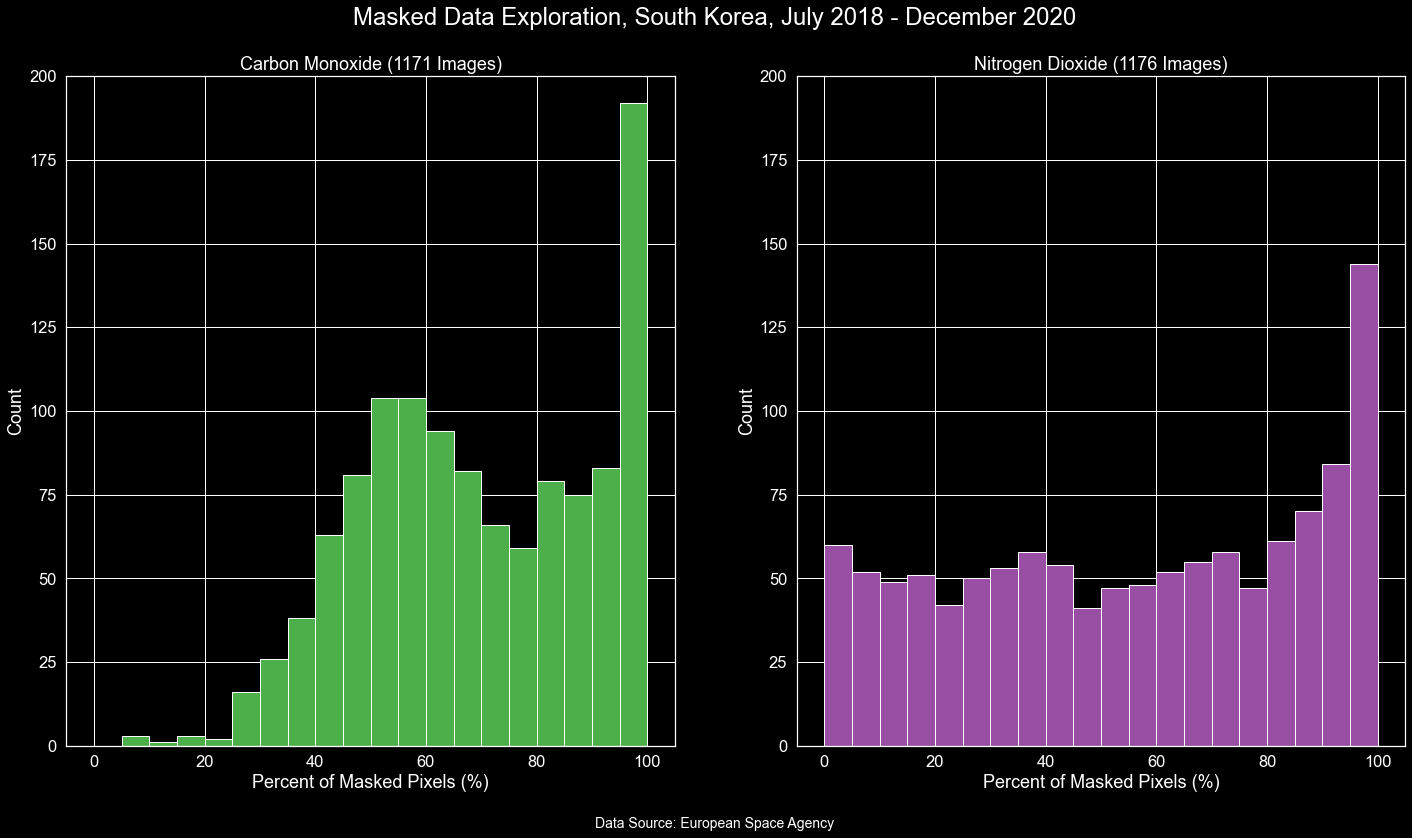

<IPython.core.display.Javascript object>

In [13]:
with plt.style.context("dark_background"):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 12))
    #     plt.hist(x=percent_masked_co, bins=20, ax=ax[0])
    ax[0].hist(
        x=percent_masked_co,
        bins=20,
        #                color="#984ea3",
        color="#4daf4a",
        range=(0, 100),
    )
    ax[1].hist(x=percent_masked_no2, bins=20, color="#984ea3", range=(0, 100))
    # Add super title
    plt.suptitle(
        f"Masked Data Exploration, South Korea, July 2018 - December 2020",
        size=24,
    )

    # Adjust spacing
    plt.subplots_adjust(top=0.9)

    # Add caption
    fig.text(
        0.5,
        0.03,
        f"Data Source: European Space Agency",
        ha="center",
        fontsize=14,
    )

    titles = [
        f"Carbon Monoxide ({image_count_co} Images)",
        f"Nitrogen Dioxide ({image_count_no2} Images)",
    ]
    for index, axis in enumerate(fig.axes):
        axis.set_title(titles[index])
        axis.set_xlabel("Percent of Masked Pixels (%)")
        axis.set_ylabel("Count")
        axis.set_ylim(0, 200)

stl.save_figure(
    output_path=os.path.join(
        "04-graphics-outputs",
        "histograms",
        "south-korea",
        "south-korea-percent-masked-histograms-20-bin-co-no2-20180701-20201231",
    )
)

Saved plot: south-korea-percent-masked-histograms-5-bin-co-no2-20180701-20201231


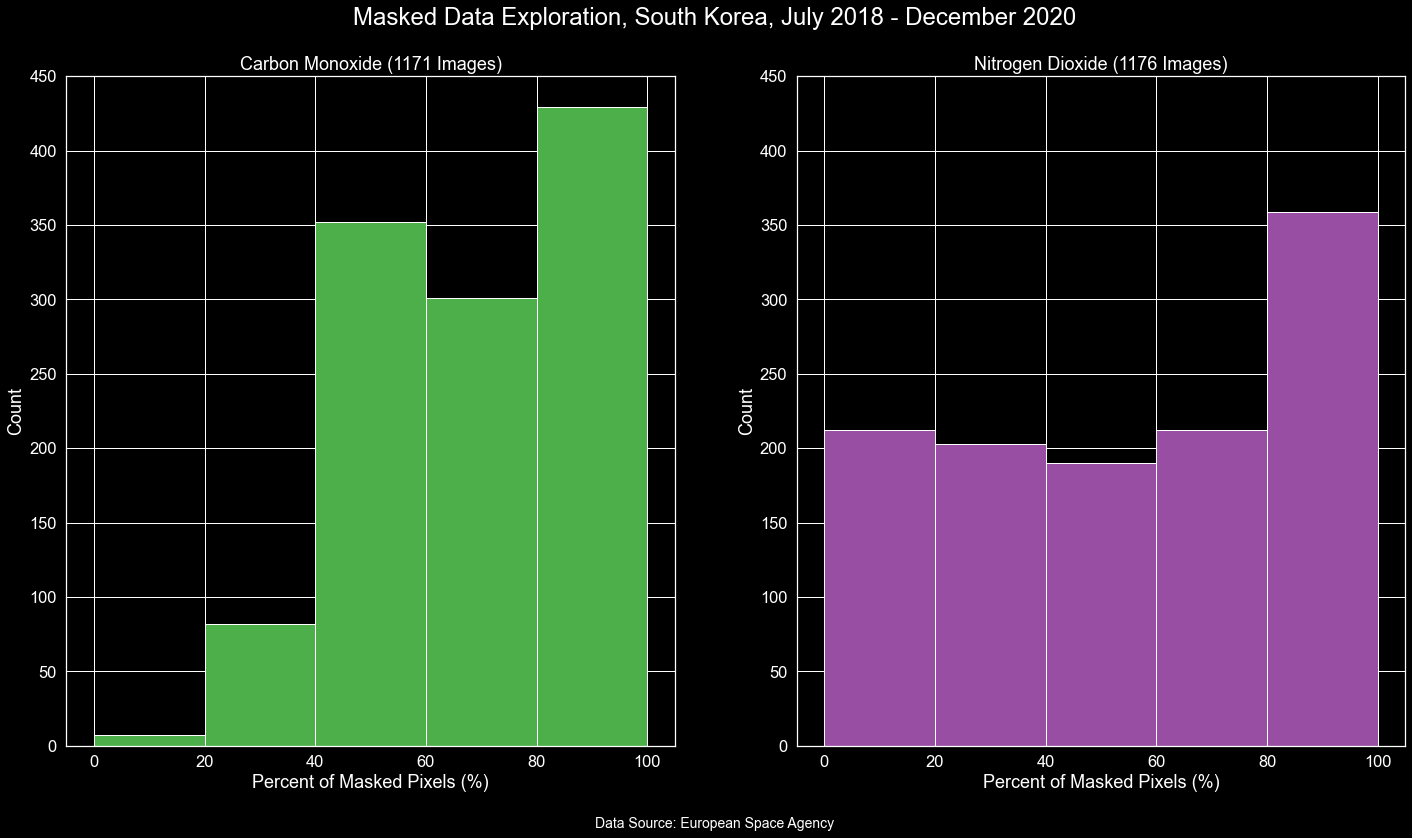

<IPython.core.display.Javascript object>

In [12]:
with plt.style.context("dark_background"):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 12))
    #     plt.hist(x=percent_masked_co, bins=20, ax=ax[0])
    ax[0].hist(
        x=percent_masked_co,
        bins=5,
        #         color="#984ea3",
        color="#4daf4a",
        range=(0, 100),
    )
    ax[1].hist(x=percent_masked_no2, bins=5, color="#984ea3", range=(0, 100))
    # Add super title
    plt.suptitle(
        f"Masked Data Exploration, South Korea, July 2018 - December 2020",
        size=24,
    )

    # Adjust spacing
    plt.subplots_adjust(top=0.9)

    # Add caption
    fig.text(
        0.5,
        0.03,
        f"Data Source: European Space Agency",
        ha="center",
        fontsize=14,
    )

    titles = [
        f"Carbon Monoxide ({image_count_co} Images)",
        f"Nitrogen Dioxide ({image_count_no2} Images)",
    ]
    for index, axis in enumerate(fig.axes):
        axis.set_title(titles[index])
        axis.set_xlabel("Percent of Masked Pixels (%)")
        axis.set_ylabel("Count")
        axis.set_ylim(0, 450)


stl.save_figure(
    output_path=os.path.join(
        "04-graphics-outputs",
        "histograms",
        "south-korea",
        "south-korea-percent-masked-histograms-5-bin-co-no2-20180701-20201231",
    )
)

# Data Processing

# Data Postprocessing

# Data Visualization

# Data Export